---
# Taller: Método Variacional (con Python)
### Mecánica Cuántica II
### Luis Miguel Patiño Buendía
---

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.10.1 (Python 3.10.5-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.10.1/



## Problema 3.1:

Definimos cada elemento matricial del hamiltoniano $H_{nm}$ y cada elemento matricial de superposición $S_{nm}$ en representación de coordenadas:

In [2]:
def H_S_nm(n,m):
    q, a, h, mass = symbols('q a hbar m', real=True)
    X_nm = [a**2-q**2, a**4-q**4] 
    H_nm = integrate(conjugate(X_nm[n-1])*(-(h**2)/(2*mass))*diff(X_nm[m-1],q,2),(q, -a, a))
    S_nm = integrate(conjugate(X_nm[n-1])*X_nm[m-1],(q, -a, a))
    return [H_nm, S_nm]

Ahora definimos la matriz de los elementos matriciales:

In [3]:
E = symbols('E')

H_mn = [
[H_S_nm(1,1)[0], H_S_nm(1,2)[0]],
[H_S_nm(2,1)[0], H_S_nm(2,2)[0]]
]

S_mn = [
[H_S_nm(1,1)[1], H_S_nm(1,2)[1]],
[H_S_nm(2,1)[1], H_S_nm(2,2)[1]]
]

H_mn = Matrix(H_mn)
S_mn = Matrix(S_mn)

M = H_mn - E*S_mn
M

⎡        5      3  2            7      5  2⎤
⎢  16⋅E⋅a    4⋅a ⋅h̅      128⋅E⋅a    8⋅a ⋅h̅ ⎥
⎢- ─────── + ───────   - ──────── + ───────⎥
⎢     15       3⋅m         105        5⋅m  ⎥
⎢                                          ⎥
⎢         7      5  2          9       7  2⎥
⎢  128⋅E⋅a    8⋅a ⋅h̅     64⋅E⋅a    16⋅a ⋅h̅ ⎥
⎢- ──────── + ───────  - ─────── + ────────⎥
⎣    105        5⋅m         45       7⋅m   ⎦

Ahora calculamos el determinante y despejamos a E:

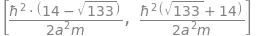

In [4]:
E_approx = solve(M[0,0]*M[1,1] - M[0,1]*M[1,0], E)
E_approx

### Estado Base

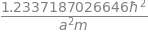

In [11]:
E_approx[0].evalf() #Valor de energía aproximado del estado base

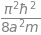

In [19]:
h,m,a = symbols('hbar m a')
E_original = (pi**2 * h**2) / (8*m*a**2)
E_original

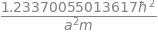

In [20]:
E_original.evalf() #Valor de energía real del estado base

### Primer Estado Excitado

In [18]:
print("Primer estado Excitado Aproximado: ", E_approx[1].evalf())
print("Primer estado Excitado Real n=2: ", 4*E_original.evalf())

Primer estado Excitado Aproximado:  12.7662812973354*hbar**2/(a**2*m)
Primer estado Excitado Real n=2:  4.93480220054468*hbar**2/(a**2*m)


 $\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$

## Problema 3.2:

In [2]:
m, w, h, v, k = symbols('m omega hbar V_0 k', real=True, positive=True)
q = symbols('q', real=True)
phi = sqrt(k / sqrt(pi)) * exp(-(Rational(1/2))*(k*q)**2) #Funcion de prueba - Oscilador Armónico
integrate(phi*conjugate(phi), (q, -oo, oo)) #Comprobar que el estado phi está normalizado

#### Integrando Término a Término
Ahora resolveremos en representación de coordenadas: $\bra{\Phi}\hat{H}\ket{\Phi}$ por integración término a término.

In [4]:
t1 = integrate(conjugate(phi)*(-(h**2)/(2*m))*diff(phi,q,2),(q, -oo, oo))
t1

In [18]:
t2 = integrate(conjugate(phi)*v*DiracDelta(q)*phi,(q, -oo, oo))
t2

In [19]:
conjugate(phi)*v*DiracDelta(q)*phi

#### Valor Esperado de Energía (sustituyendo a k)

In [20]:
expected_val = (t1 - t2).subs(k, sqrt((m*w)/h))
expected_val

#### Hallando Parámetro Variacional $\omega$

In [21]:
omega = solve(diff(expected_val, w), w)[0] #Se deriva el valor esperado, se iguala a cero
#luego se resuelve la ecuación para el omega

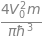

In [22]:
omega

#### Valor Esperado de Energía con $\omega$ que Minimiza la función

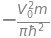

In [23]:
expected_val.subs(w, omega) #Sustituimos omega por su nuevo valor

Como vemos, el valor esperado después de sustituir el parámetro variacional $\omega$ resulta ser negativo (referente a un estado ligado) que es mayor que el valor propio de la energía original para un potencial delta dirac.

## Problema 3.3:

Comprobemos que la función sugerida está normalizada:

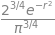

In [2]:
r,t,p,e,h,m = symbols('r theta varphi e hbar m', real=True)
phi = (2/pi)**(Rational(3/4))*exp(-(r**2))
phi

In [3]:
integrate(integrate(sin(t)*integrate(r**2*conjugate(phi)*phi, (r, 0, oo)), (t, 0, pi)),(p,0,2*pi))

Hallemos el parámetro $\eta$ para el cual la función satisface el teorema del virial:

In [4]:
eta_numerador = integrate(integrate(sin(t)*integrate(r**2*conjugate(phi)*(-(e**2)/r)*phi, (r, 0, oo)), (t, 0, pi)),(p,0,2*pi))
eta_numerador

In [5]:
eta_denominador = integrate(integrate(sin(t)*integrate(r**2*conjugate(phi)*(-(h**2/2*m)*(1/r**2)*diff(r**2*diff(phi,r), r)), (r, 0, oo)), (t, 0, pi)),(p,0,2*pi))
eta_denominador

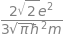

In [18]:
eta = -(Rational(1/2))*(eta_numerador/eta_denominador)
eta

Veamos ahora como para el $\eta$ obtenido se satisface el teorema del virial:

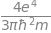

In [15]:
et = symbols('eta', real=True, positive=True)
phi_eta = ((2*et**2)/pi)**(Rational(3/4))*exp(-((et*r)**2))
integrate(integrate(sin(t)*integrate(r**2*conjugate(phi_eta)*(-(h**2/2*m)*(1/r**2)*diff(r**2*diff(phi_eta,r), r)), (r, 0, oo)), (t, 0, pi)),(p,0,2*pi)).subs(et,eta)

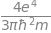

In [16]:
-(Rational(1/2))*integrate(integrate(sin(t)*integrate(r**2*conjugate(phi_eta)*(-(e**2)/r)*phi_eta, (r, 0, oo)), (t, 0, pi)),(p,0,2*pi)).subs(et, eta)

En ambos casos se obtuvo el mismo resultado, conforme a $\bra{\Phi_{\eta}}\hat{T}\ket{\Phi_{\eta}} = -\frac{1}{2} \bra{\Phi_{\eta}}\hat{V}\ket{\Phi_{\eta}}$.

## Problema 3.5:

Definamos el la función de prueba $\Phi = \Phi_1 * \Phi_2$:

In [2]:
m, w0, h, k = symbols('m omega_0 hbar k_{\Omega}', real=True, positive=True)
q1, q2, lmd = symbols('q_1 q_2 lambda', real=True)
phi1 = sqrt(k / sqrt(pi)) * exp(-(Rational(1/2))*(k*q1)**2) 
phi2 = sqrt(k / sqrt(pi)) * exp(-(Rational(1/2))*(k*q2)**2) 

phi_total = phi1 * phi2

In [3]:
phi_total

Nuevamente, desarrollaremos el valor esperado a términos. Primero el numerador: $\bra{\Phi}\hat{H}\ket{\Phi}$ 

In [4]:
numerador = integrate(integrate( conjugate(phi_total) * (-(((h**2)/(2*m))*diff(phi_total,q1,2)) - (((h**2)/(2*m))*diff(phi_total,q2,2)) + (Rational(1/2)*m*(w0**2)*(q1**2))*phi_total + (Rational(1/2)*m*(w0**2)*(q2**2))*phi_total + lmd*((m**2 * w0**2 * (q1**2) * (q2**2))/h)*phi_total), (q1, -oo, oo) ), (q2, -oo, oo))

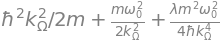

In [5]:
numerador

Ahora el denominador: $\bra{\Phi}\ket{\Phi}$

In [6]:
denominador = integrate(integrate( conjugate(phi_total) * phi_total, (q1, -oo, oo) ), (q2, -oo, oo))

In [7]:
denominador

Observemos que el producto interior de un estado compuesto por el producto de otros dos estados ya normalizados, es igual a la unidad, es decir, el estado más general también está normalizado.

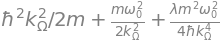

In [8]:
valor_esperado_E = numerador / denominador
valor_esperado_E

Ahora sustituimos $k_{\Omega}$ en el valor esperado obtenido, quedando:

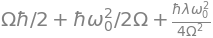

In [9]:
omega = symbols('Omega', positive=True, real=True)
val_exp_final = valor_esperado_E.subs(k, sqrt((m*omega)/h))
val_exp_final

Ahora, encontremos el $\Omega$ para el cual el valor esperado de la energía es un mínimo:

In [10]:
omega_optimo = solve(diff(val_exp_final, omega).subs(lmd, 1), omega) #Se deriva el valor esperado, se iguala a cero
#luego se resuelve la ecuación para el omega

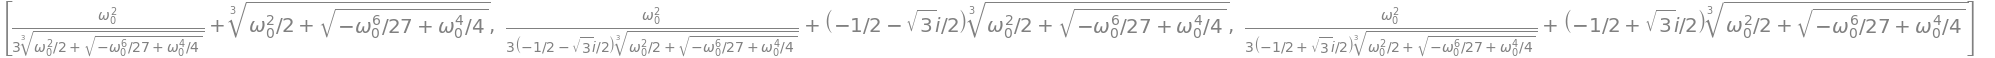

In [11]:
omega_optimo

Observamos que se obtiene como resultado una lista con 3 raíces (separadas por la coma). En este caso, consideramos $\lambda = 1$ y se obtuvo una raíz real y dos complejas. (No podemos inferir mucho sobre estas raíces sin conocer el valor de $\lambda$ y $\omega_0$)

## Problema 3.6:

Definamos la función de prueba $\Phi(q, \Omega)$.

In [9]:
m, w, h, v0, k, q0 = symbols('m omega hbar V_0 k_{\Omega} q_0', real=True, positive=True)
q = symbols('q', real=True)
lmd = symbols('lambda', real=True, positive=True)
phi = sqrt(k / sqrt(pi)) * exp(-(Rational(1/2))*(k*q)**2) #Funcion de prueba - Oscilador Armónico

Ahora hallemos el valor esperado de energía $\bra{\Phi}\hat{H}\ket{\Phi}$, asumiendo que $\lambda > 0$:

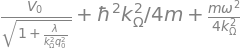

In [10]:
valor_esperado = integrate(conjugate(phi)*((-(h**2)/(2*m))*diff(phi,q,2) +(Rational(1/2)*m*(w**2)*(q**2))*phi + (v0*exp(-lmd*(q/q0)**2))*phi),(q, -oo, oo))
valor_esperado

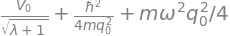

In [13]:
valor_esperado_k = valor_esperado.subs(k, 1/q0)
valor_esperado_k

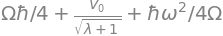

In [17]:
Omega = symbols('Omega', real=True, positive=True)
valor_esperado_q0 = valor_esperado_k.subs(q0, sqrt(h/(m*Omega)))
valor_esperado_q0

Recordando que la frecuencia $\Omega \geq 0$ para que sea físicamente consistente. Seguidamente, derivamos con respecto al parámetro $\Omega$ e igualamos a cero:

In [18]:
Omega_optimo = solve(diff(valor_esperado_q0, Omega), Omega)
Omega_optimo

Como se observa, la única raíz resulta en $\Omega = \omega$.

Por ende, el valor propio de la energía del estado base aproximado quedaría expresado como:

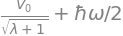

In [19]:
valor_esperado_q0.subs(Omega, w)

## Problema 3.7:

In [20]:
m, w0, w1, h, k = symbols('m omega_0 omega_1 hbar k_{\Omega}', real=True, positive=True)
q1, q2 = symbols('q_1 q_2', real=True)
phi1 = sqrt(k / sqrt(pi)) * exp(-(Rational(1/2))*(k*q1)**2) 
phi2 = sqrt(k / sqrt(pi)) * exp(-(Rational(1/2))*(k*q2)**2) 

phi_total = phi1 * phi2

In [21]:
phi_total

Nuevamente, desarrollaremos el valor esperado: $\bra{\Phi}\hat{H}\ket{\Phi}$ 

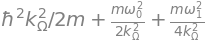

In [22]:
valor_esperado = integrate(integrate( conjugate(phi_total) * (-(((h**2)/(2*m))*diff(phi_total,q1,2)) - (((h**2)/(2*m))*diff(phi_total,q2,2)) + (Rational(1/2)*m*(w0**2)*(q1**2))*phi_total + (Rational(1/2)*m*(w0**2)*(q2**2))*phi_total + (Rational(1/4)*m*(w1**2)*(q1-q2)**2)*phi_total), (q1, -oo, oo) ), (q2, -oo, oo))
valor_esperado

Ahora sustituimos $k_{\Omega}$ en el valor esperado obtenido, quedando:

In [24]:
omega = symbols('Omega', positive=True, real=True)
valor_esperado_k = valor_esperado.subs(k, sqrt((m*omega)/h))
valor_esperado_k

In [26]:
omega_optimo = solve(valor_esperado_k.diff(omega), omega)

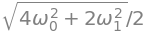

In [28]:
omega_optimo[0]

y el valor propio de energía aproximado $E_0'$ estaría dado por:

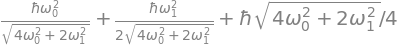

In [29]:
valor_esperado_k.subs(omega, omega_optimo[0])

y la función de onda correspondiente que describe el estado base dentro de esta aproximación estaría dado por:

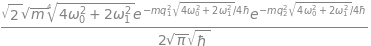

In [30]:
phi_total.subs(k, sqrt((m*omega)/h)).subs(omega, omega_optimo[0])